In [7]:
import spyndex as spy
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
import math

In [12]:
def calculate_indices(red, blue, green, nir, rededge):
    
    ndvi = (nir - red) / (nir + red)
    osavi = (1 + 0.16)*(nir - red) / (nir + red + 0.16)
    tcari = 3*((rededge - red) - 0.2*(rededge - green)*(rededge / red))
    tcariosavi = tcari / osavi
    evi = 2.5 * ((nir - red) / (nir + 6 * red - 7.5 * blue + 1))
    mcari = ((rededge - red) - 0.2 * (rededge - green)) * (rededge / red)
    mcariosavi = mcari / osavi
    sr = red / nir
    tvi = np.sqrt((ndvi + 0.5))
    ndrei = (nir - rededge) / (nir + rededge)

    return np.array([ndvi, osavi, tcari, tcariosavi, evi, mcari, mcariosavi, sr, tvi, ndrei])

In [13]:
src = rio.open(r"C:\Users\giova\OneDrive\Desktop\Resampled\3 Zeuli 220623\MULTI_ORTHO\3 Zeuli 220623 ORTHO_MULTI_R_G_B_NIR_RE")

red = src.read(1)
green = src.read(2)
blue = src.read(3)
nir = src.read(4)
rededge = src.read(5)

scaled_red = red / 10000
scaled_green = green / 10000
scaled_blue = blue / 10000
scaled_nir = nir / 10000
scaled_rededge = rededge / 10000

In [14]:
indices = calculate_indices(red, blue, green, nir, rededge)

C:\Users\giova\AppData\Local\Temp\ipykernel_10408\1184612834.py:3: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red) / (nir + red)
C:\Users\giova\AppData\Local\Temp\ipykernel_10408\1184612834.py:5: RuntimeWarning: divide by zero encountered in divide
  tcari = 3*((rededge - red) - 0.2*(rededge - green)*(rededge / red))
C:\Users\giova\AppData\Local\Temp\ipykernel_10408\1184612834.py:5: RuntimeWarning: invalid value encountered in divide
  tcari = 3*((rededge - red) - 0.2*(rededge - green)*(rededge / red))
C:\Users\giova\AppData\Local\Temp\ipykernel_10408\1184612834.py:5: RuntimeWarning: invalid value encountered in multiply
  tcari = 3*((rededge - red) - 0.2*(rededge - green)*(rededge / red))
C:\Users\giova\AppData\Local\Temp\ipykernel_10408\1184612834.py:6: RuntimeWarning: divide by zero encountered in divide
  tcariosavi = tcari / osavi
C:\Users\giova\AppData\Local\Temp\ipykernel_10408\1184612834.py:7: RuntimeWarning: divide by zero encountered in divide
  evi =

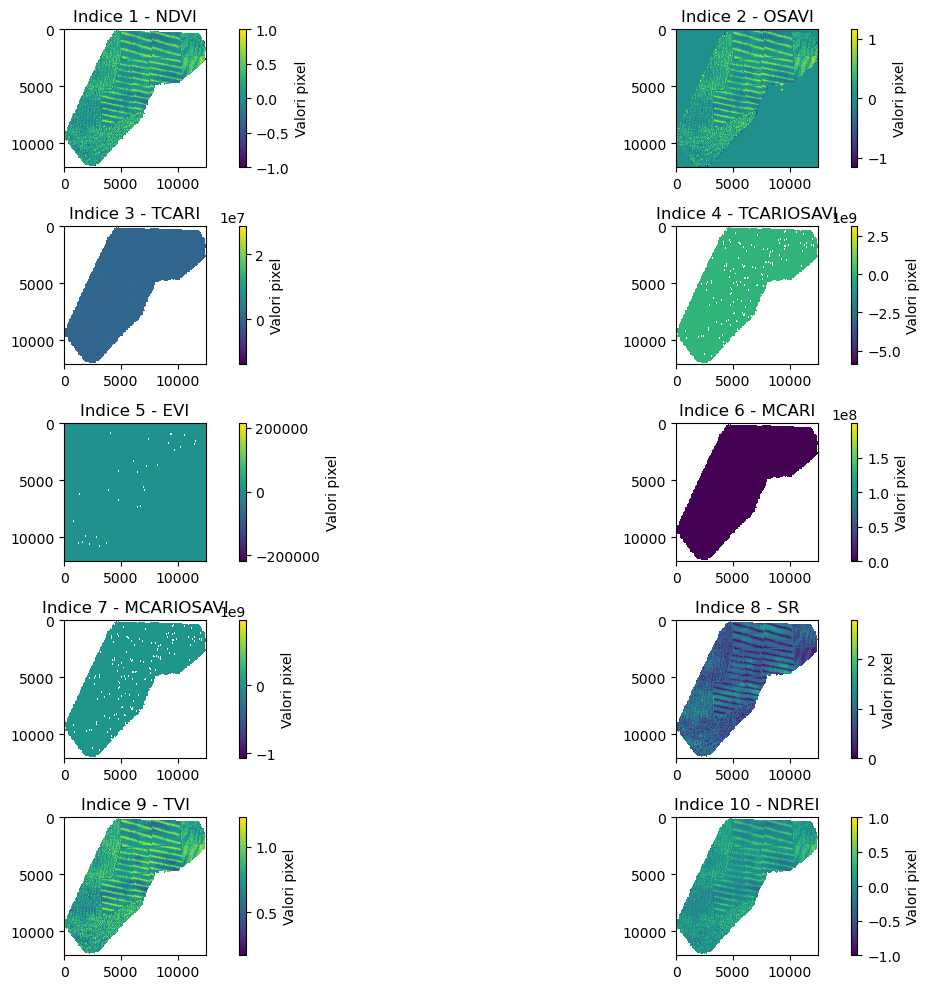

In [15]:
# Visualizzazione delle bande degli indici vegetativi
plt.figure(figsize=(15, 10))

# Nomi degli indici
indice_names = ["NDVI", "OSAVI", "TCARI", "TCARIOSAVI", "EVI", "MCARI", "MCARIOSAVI", "SR", "TVI", "NDREI"]

# Loop per visualizzare ciascuna banda
for i in range(len(indices)):
    ax = plt.subplot(5, 2, i+1)
    im = ax.imshow(indices[i], cmap='viridis')  # Imposta il range dei valori per la mappa colore
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04, label='Valori pixel')  # Regola le dimensioni della legenda e imposta il range dei valori
    plt.title(f'Indice {i+1} - {indice_names[i]}')  # Aggiungi il nome dell'indice come titolo del subplot
    #plt.text(0.5, -0.1, indice_names[i], ha='center', transform=ax.transAxes)  # Aggiungi il nome dell'indice come testo

plt.tight_layout()
plt.show()

In [6]:
# Controllo dei valori degli indici
for i, indice in enumerate(indices):
    out_of_range_pixels = np.logical_or(indice < -1, indice > 1)
    num_out_of_range_pixels = np.sum(out_of_range_pixels)
    total_pixels = np.prod(indice.shape)
    if num_out_of_range_pixels > 0:
        percent_outliers = (num_out_of_range_pixels / total_pixels) * 100
        print(f"L'indice {indice_names[i]} contiene {num_out_of_range_pixels} pixel con valori non compresi tra -1 e 1, che rappresentano il {percent_outliers:.2f}% dei pixel totali ({total_pixels}).")
    else:
        print(f"L'indice {indice_names[i]} non contiene valori non compresi tra -1 e 1.")


L'indice NDVI non contiene valori non compresi tra -1 e 1.
L'indice OSAVI contiene 964276 pixel con valori non compresi tra -1 e 1, che rappresentano il 0.64% dei pixel totali (151442694).
L'indice TCARI contiene 77560453 pixel con valori non compresi tra -1 e 1, che rappresentano il 51.21% dei pixel totali (151442694).
L'indice TCARIOSAVI contiene 77565366 pixel con valori non compresi tra -1 e 1, che rappresentano il 51.22% dei pixel totali (151442694).
L'indice EVI contiene 45841622 pixel con valori non compresi tra -1 e 1, che rappresentano il 30.27% dei pixel totali (151442694).
L'indice MCARI contiene 77047965 pixel con valori non compresi tra -1 e 1, che rappresentano il 50.88% dei pixel totali (151442694).
L'indice MCARIOSAVI contiene 77061479 pixel con valori non compresi tra -1 e 1, che rappresentano il 50.88% dei pixel totali (151442694).
L'indice SR contiene 32300964 pixel con valori non compresi tra -1 e 1, che rappresentano il 21.33% dei pixel totali (151442694).
L'indice